<a href="https://colab.research.google.com/github/ScottEricson/PHYS486-S22/blob/main/ProjectOne/ProjectOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lots of imports
#copied from Euler_Projectile.ipynb
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.colorbar as cb

#set plot preferences
from IPython.display import set_matplotlib_formats
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.linewidth'] = 2
#plt.rcParams['axes.tickwidth'] = 8

plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

We want to model projectile motion iteratively using Euler method. First we need to determine some parameters

In [24]:
#start with some constants
g = 9.8 #model is for Earth's surface (near)
x = 0. #x always starts at the origin for convenience

#these constants should be allowed to change for different models, start with
#no drag, but we'll use it later.
C = 0.5
A = 0.1
rho = 1.225
m = 100.
timestep = 0.1

#use a variable to combine all the drag constants
k = 0.5*C*A*rho/m

#these variables are the initial values. Start from rest and vertical drop case
y = 1000.
theta = - np.pi/2
v_0=1.
v_x = v_0*math.cos(theta)
v_y = v_0*math.sin(theta)



Now we can iterate (velocities from acceleration), and (position from velocities) to estimate the curve

In [18]:
#iterate position in x and y
def update_pos(x,y,v_x,v_y,timestep):
  x_new = x + v_x*timestep
  y_new = y + v_y*timestep
  return x_new, y_new

#iterate velocity in y (velocity in x is constant for the no-drag case)
def update_vel_y(g,v_y,timestep):
  v_y_new = v_y - g*timestep
  return v_y_new

#write arrays for positions and times
def model_nodrag(x,y,timestep):
  ypositions = [] #put the first enrty of each array
  ypositions.append(y)
  xpositions = []
  xpositions.append(x)
  times = []
  times.append(0.)

  t = 0. #prime the while loop with dummy variables and first iterations
  i = 0
  t += timestep
  x_new,y_new = update_pos(x,y,v_x,v_y,timestep)
  v_y_new = update_vel_y(g,v_y,timestep)

  while (ypositions[i] >= 0): #make all the rest of the iterations until floor is hit
    ypositions.append (y_new)
    xpositions.append (x_new)
    times.append(t)
    x_new,y_new = update_pos(x_new,y_new,v_x,v_y_new,timestep)
    v_y_new = update_vel_y(g,v_y_new,timestep)
    t += timestep
    i += 1

  return xpositions,ypositions,times, i

Let's graph y vs. time:

fall time =  14.299999999999965


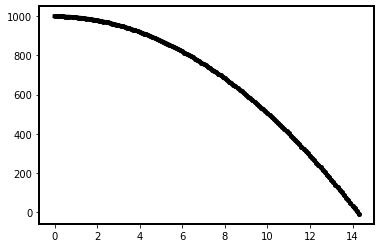

In [25]:
xpositions,ypositions,times, i = model_nodrag(x,y,timestep)
plt.plot(times[:],ypositions[:],marker = 'o', color = 'black', markersize = 4)
falltime_nd = times[i]
print("fall time = ",falltime_nd)

Now calculate the analytical solution as a check.

0=1000-(1/2)gt**2

2000=gt**2

t = 14.2857 seconds.

That's pretty close.

We can try the drag case. position iteration will be the same, but velocity needs a new function

In [26]:
#iterate velocity in both x and y
def update_drag_vel(v_x,v_y,timestep,k,g,m):
  v = math.sqrt(v_x**2+v_y**2)

  F_D_x = -k*v*v_x
  v_x_drag = v_x + F_D_x*timestep/m

  F_D_y = -k*v*v_y
  v_y_drag = v_y - g*timestep + F_D_y*timestep/m

  return v_y_drag, v_x_drag

#write arrays for positions and times
def model_drag(x,y,timestep):
  yd_positions = [] #put the first enrty of each array
  yd_positions.append(y)
  xd_positions = []
  xd_positions.append(x)
  d_times = []
  d_times.append(0.)

  t = 0. #prime the while loop with dummy variables and first iterations
  j = 0
  t += timestep
  x_new,y_new = update_pos(x,y,v_x,v_y,timestep)
  v_x_drag,v_y_drag = update_drag_vel(v_x,v_y,timestep,k,g,m)

  while (ypositions[j] >= 0): #make all the rest of the iterations until floor is hit
    yd_positions.append (y_new)
    xd_positions.append (x_new)
    d_times.append(t)
    x_new,y_new = update_pos(x_new,y_new,v_x_drag,v_y_drag,timestep)
    v_x_drag,v_y_drag = update_drag_vel(v_x_drag,v_y_drag,timestep,k,g,m)
    t += timestep
    j += 1

  return xd_positions,yd_positions,d_times, j

fall time =  14.299999999999965


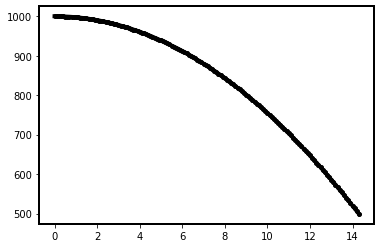

In [27]:
xd_positions,yd_positions,d_times, j = model_drag(x,y,timestep)
plt.plot(d_times[:],yd_positions[:],marker = 'o', color = 'black', markersize = 4)
falltime_d = d_times[j]
print("fall time = ",falltime_d)
